In [30]:
#Libraries that we will be using
import numpy as np #for manipulation with arrays
import pandas as pd #for manipulating the dataset
import matplotlib.pyplot as plt #for graphing the results

In [36]:
#KNN: K Nearest Neighbours. Receives the data and category (in this case, the species) of the training dataset, as well as
#the unkown element. It requires a value of K for calculating the k nearest neighbours, which is equal to 7 by default.
#The choice for k=7 is just because it's a small value (and therefore, tries to get only very close points) and because it's
#a prime (which helps reduce the chances for ties between categories)
def KNN(data_training, species_training, unkown, k=7):
    #Calculates all the distances between the unknown point and each point from the data_training
    dists = np.array([])
    for i in range(len(data_training)):
        dist = np.linalg.norm(data_training[i]-unkown)
        dists = np.append(dists, dist)
    
    #Calculates all the possible species, which are the species of the k nearest points
    species_possible = np.array([])
    for i in range(k):
        index_species = np.argmin(dists)
        species_possible = np.append(species_possible, species_training[index_species])
        dists = np.delete(dists, index_species)
    
    #Selects the species which appears more ofter in the neighbours
    unique,pos = np.unique(species_possible, return_inverse=True)
    counts = np.bincount(pos)
    species_selected = unique[np.argmax(counts)]
    
    #Returns the selected species
    return species_selected

In [32]:
#Getting the dataset
df = pd.read_csv('iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [33]:
#Slicing the dataset into a array with the values for the sepals and petals, as well as a array for the species
data = df.loc[:,'sepal.length':'petal.width'].to_numpy()
species = df['variety'].to_numpy()

In [34]:
#Training set
data_training = np.concatenate((data[::3],data[1::3]))
species_training = np.concatenate((species[::3], species[1::3]))
print(data_training.shape, species_training.shape)

#Testing set
data_test = data[2::3]
species_test = species[2::3]
print(data_test.shape, species_test.shape)

(100, 4) (100,)
(50, 4) (50,)


In [35]:
#Testing the model for k=15
correct = 0
for i in range(len(data_test)):
    if KNN(data_training, species_training, data_test[i], k=15) == species_test[i]:
        correct+=1
print('Accuracy = {}%'.format(correct/len(data_test)*100))

Accuracy = 94.0%


In [39]:
#Let's see how the accuracy varies for differents values of k
k_values = np.arange(1,len(data_test)+1)
accuracies = np.array([])
for k in k_values:
    correct = 0
    for i in range(len(data_test)):
        if KNN(data_training, species_training, data_test[i], k=k) == species_test[i]:
            correct+=1
    accuracies = np.append(accuracies, correct/len(data_test)*100)

In [40]:
#Visualizing the accuracies on a table
df = pd.DataFrame(accuracies, index=k_values)
df

,0
1,96.0
2,96.0
3,98.0
4,98.0
5,96.0
6,98.0
7,96.0
8,94.0
9,96.0
10,94.0


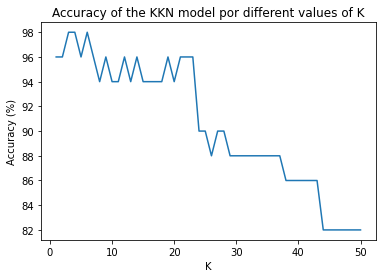

In [27]:
#Visualizing the accuracies on a graph
plt.plot(k_values, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy (%)')

plt.title('Accuracy of the KNN model por different values of K')

plt.show()